In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
%matplotlib inline
from empath import Empath

In [3]:
path_to_data = '../Data/Restaurant reviews.csv'
df = pd.read_csv(path_to_data)
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Restaurant  10000 non-null  object 
 1   Reviewer    9962 non-null   object 
 2   Review      9955 non-null   object 
 3   Rating      9962 non-null   object 
 4   Metadata    9962 non-null   object 
 5   Time        9962 non-null   object 
 6   Pictures    10000 non-null  int64  
 7   7514        1 non-null      float64
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


In [7]:
df.dropna(subset=['Review'],inplace=True)

In [8]:
len(df[df['Review'].isna() == True])

0

In [9]:
#spliting dataframes acc. to different values of rating column
def split_dataframe_func(df):
    ''''takes in dataframe and returns dictionary, with keys as 5 different values of ratings
    score (5,4,3,2)and values as the dataframes of the same score.
    '''
    ratings = ['5', '4', '3', '2', '1']
    split_dataframes = {}
    
    for rating in ratings:
        split_dataframes[rating] = df[df['Rating'] == rating]
                                      
    return split_dataframes

In [10]:
def generate_wordcloud(text,rem_stop_words=True):
    
    '''Generates the word cloud of the given text, if rem_stop_words is set False 
    then it does not remove stop words'''
    
    if  rem_stop_words:
        wordcloud = WordCloud()
    else:
        wordcloud = WordCloud(stopwords=[' '])
    wordcloud.generate(text)

    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Rating: 5


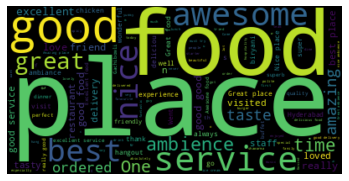

Rating: 4


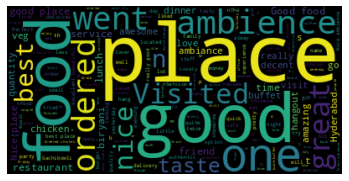

Rating: 3


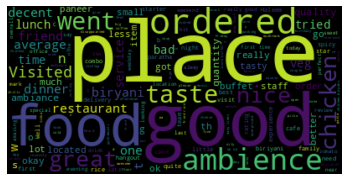

Rating: 2


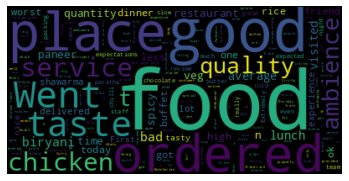

Rating: 1


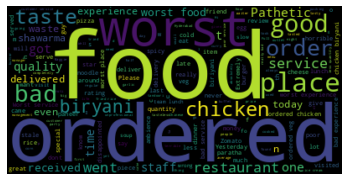

In [242]:
#when removing stop words
split_dataframes = split_dataframe_func(df)
for key in split_dataframes.keys():
    print(f"Rating: {key}")
    text = split_dataframes[key]['Review'].to_string()
    generate_wordcloud(text)

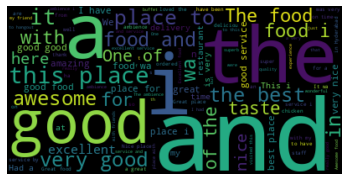

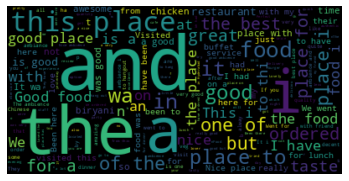

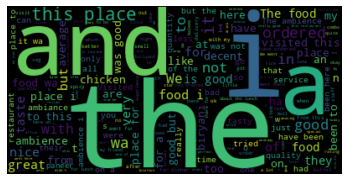

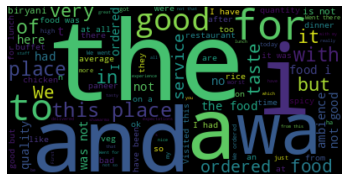

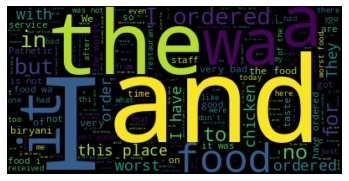

In [243]:
#when not removing stop words
for key in split_dataframes.keys():
    text = split_dataframes[key]['Review'].to_string()
    generate_wordcloud(text, rem_stop_words=False)

In [11]:
#path to positve (pos) and negative (neg) text files
pos_txt_path = '../Data/positive-words.txt'
neg_txt_path = '../Data/negative-words.txt'

def emo_words():
    
    '''returns word_dict which is a dictionary that contains list of positive and 
    negative sentiment words'''
    
    word_dict = {}
    with open(pos_txt_path, 'r') as file1:
        
        #upto line 30 we have just commentry about the dataf files, that can't be used.
        for _ in range(30):
            next(file1)
            
        for line in file1:
            lines_pos = file1.read()
            list_wor = " ".join(lines_pos.splitlines()).split()
            word_dict['pos_words'] = list_wor
            
    with open(neg_txt_path, 'r') as file2:
        for _ in range(30):
            next(file2)
            
        for line in file2:
            lines_pos = file2.read()
            list_wor = " ".join(lines_pos.splitlines()).split()
            word_dict['neg_words'] = list_wor
            
    return word_dict
        

In [12]:
word_dict = emo_words()

In [13]:
def pre_process(sentence):
    
    '''takes a sentnce as input removes stopwords, tokennizes and keeps only those words
    which have either positive or negative sentiment'''
    
    stopwords = list(set(nltk.corpus.stopwords.words('english')))
    #print(sentence), cathes a bug here some times
    words = word_tokenize(sentence)
    
    #sometimes review is empty it breaks stopwords code
    if not words:
        return None
    
    #remove those words not in positive text file or negative text file.
    words = [word.lower() for word in words if word.isalpha() and word not in stopwords]
    senti_words = [word.lower() for word in words if word in word_dict['pos_words'] or word in word_dict['neg_words']]
    
    return senti_words

In [120]:
#takes each review passes through pre_process function saves into new column
#called lex_review (lexicon_reviews)
for i in range(len(df)):
    
    a = pre_process(df.iloc[i]['Review'])
    if a:
        
        df.loc[i, 'lex_review'] =  " ".join(a)
        
    else:
        df.loc[i, 'lex_review'] = ""

In [15]:
#review before processing
df.loc[0, 'Review']

'The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\nGood place for a sate brunch. One can also chill with friends and or parents.\nWaiter Soumen Das was really courteous and helpful.'

In [16]:
#same review after pre_process function
df.loc[0, 'lex_review']

'good good effective good chill courteous helpful'

In [17]:
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514,lex_review
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0.0,2447.0,good good effective good chill courteous helpful
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0.0,NaN,good pleasant prompt good good kudos
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0.0,NaN,great great recommendation amazing
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0.0,NaN,great good like
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0.0,NaN,good well enjoyed good


Rating: 5


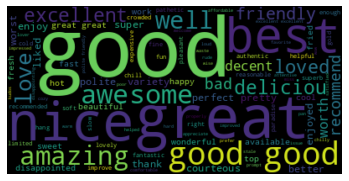

Rating: 4


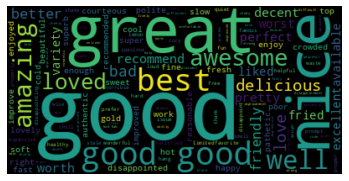

Rating: 3


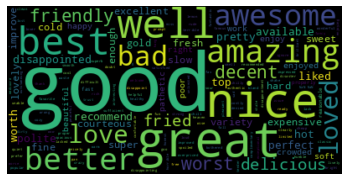

Rating: 2


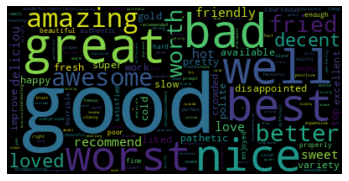

Rating: 1


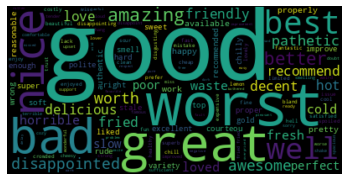

In [18]:
#generating word cloud using only sentiment words

split_dataframes = split_dataframe_func(df)
for key in split_dataframes.keys():
    print(f"Rating: {key}")
    text = split_dataframes[key]['lex_review'].to_string()
    generate_wordcloud(text)

In [19]:
def empath_df():
    '''takes reviews of dataframes of 5 different scores (5,4,3,2,1)
    passes it to empath to get lexical categories of reviews and plots only top 15 among
    all the categories'''
    
    for key in split_dataframes.keys():
        
        lexicon = Empath()
        
        print(f"Rating: {key}")
        text = split_dataframes[key]['lex_review'].to_string()
        x = lexicon.analyze(text, normalize=True)
        #reverse sorting dictionary based on values of each category
        d = {k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse=True)}
        #taking only top 15 categories
        categories = list(d.keys())[:15]
        values = list(d.values())[:15]

        # Create a bar plot
        plt.figure(figsize=(10,6))
        plt.bar(categories, values)
        plt.xticks(rotation=45)

        # Set labels and title
        plt.xlabel('Categories')
        plt.ylabel('Values')
        plt.title('Bar Plot of Dictionary Values')

        # Show the bar plot
        plt.show()

Rating: 5


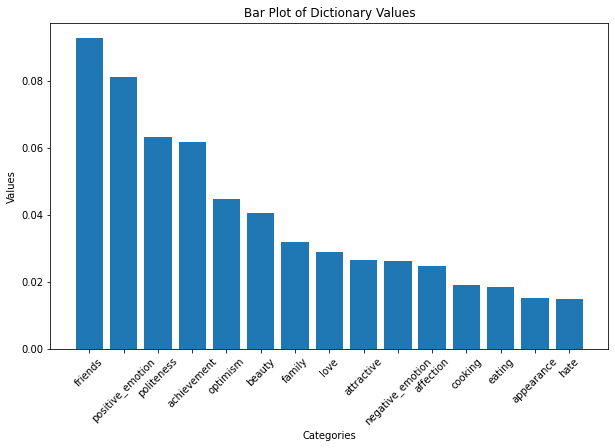

Rating: 4


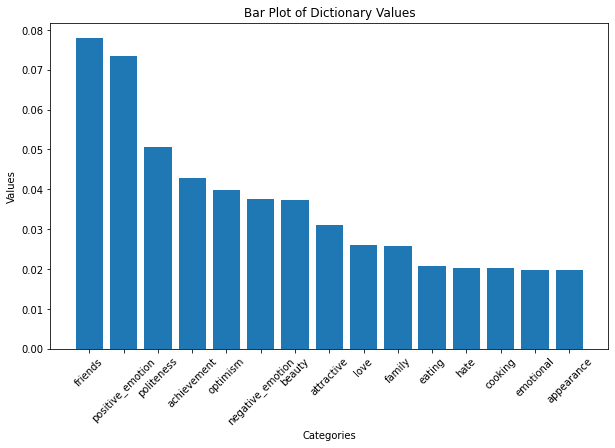

Rating: 3


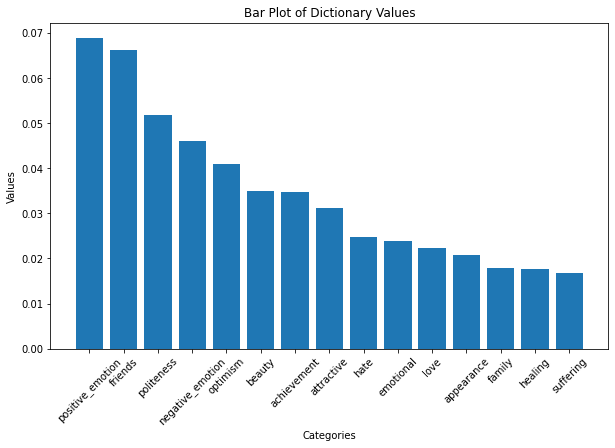

Rating: 2


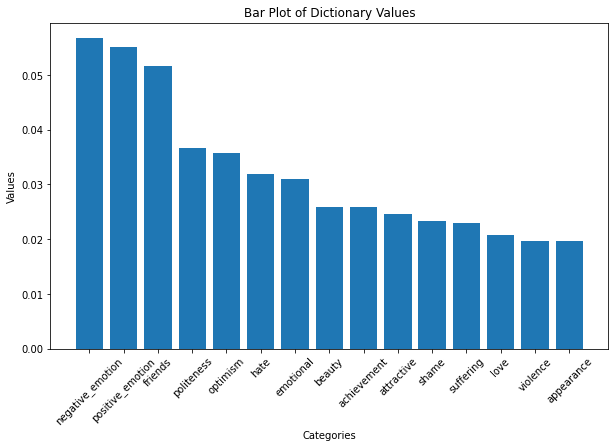

Rating: 1


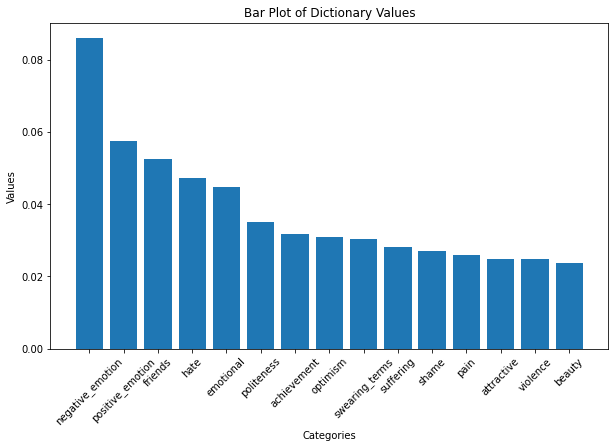

In [24]:
empath_df()
#as rating go down most prominet emotions change from positive to negative

In [25]:
def create_bar_plot(x,y):
    '''helper function to create barplot'''
    # Create a bar plot
    plt.figure(figsize=(10,6))
    plt.bar(y, x)
    plt.xticks(rotation=45)

    # Set labels and title
    plt.xlabel('Categories')
    plt.ylabel('Values')
    plt.title('Bar Plot of Dictionary Values')

    # Show the bar plot
    plt.show()

In [22]:
def pos_neg_proportion():
    '''takes 5 different dataframes based on rating score and calculates normalized
    number of positive and negative words in it'''
    
    for key in split_dataframes.keys():
        pos_words = 0
        neg_words = 0
        #to normalize number of words
        count = 0
        print(f"Ploting for:{key}")
        
        for i in split_dataframes[key]['Review'].to_string().split():
            count+=1
            if i in word_dict['pos_words']:
                pos_words+=1
            elif i in word_dict['neg_words']:
                neg_words+=1
        
        create_bar_plot([pos_words/count, neg_words/count],["positive_words", "negative_words"])

Ploting for:5


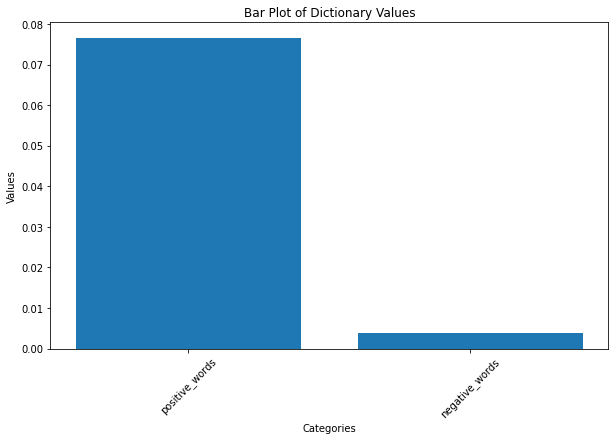

Ploting for:4


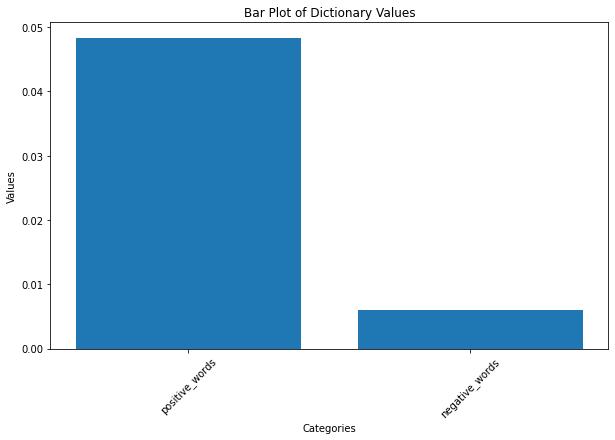

Ploting for:3


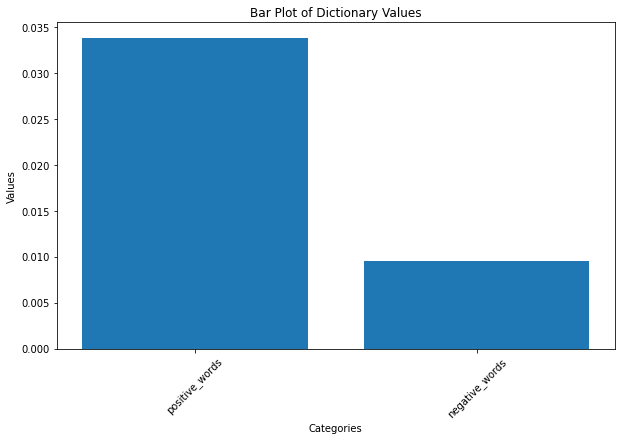

Ploting for:2


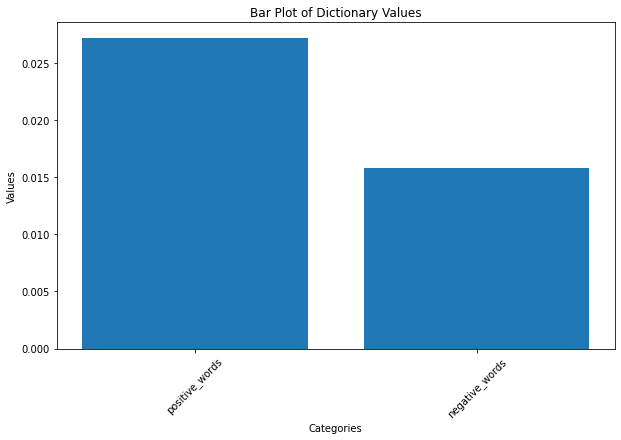

Ploting for:1


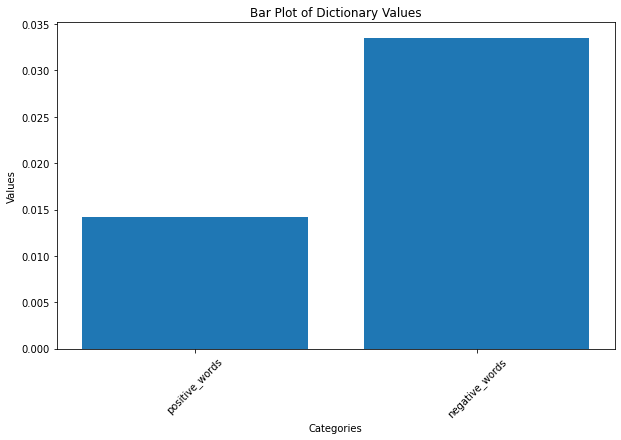

In [23]:
pos_neg_proportion()
#as ratings go down negative words are more prominent